# Análisis de una señal de ECG mediante la Transformada Discreta de Fourier

Mi amor! aca te dejo un programita de prueba, las funciones las copie del libro y estan en el script `utils.py` las funciones que debes utilizar son `dft(ys)` y `idft(fs)`

### importamos módulos útiles
Acá importamos todo el contenido del archivo utils incluyendo las librerías

In [1]:
%matplotlib inline
from utils import *

### importamos los datos de ECG
Los archivos .CSV que descargamos son muy grandes para la memoria, yo utilicé solamente las primeras 2000 muestras que son 5.55 segundos, pero puedes probar con mas o con menos. Utiliza la función `getArray(filename)`
## aquí cambiar el archivo .csv

In [53]:
nSamples = 2000 # numero de muestras a analizar
ecg1 = getArray("taki1.csv")[:nSamples]

In [54]:
fs = 360.0 # frecuencia de muestreo
ts = 1 / fs # tiempo de muestreo
duracion = nSamples / fs # duración de la señal
ts = np.linspace(0, duracion, nSamples)

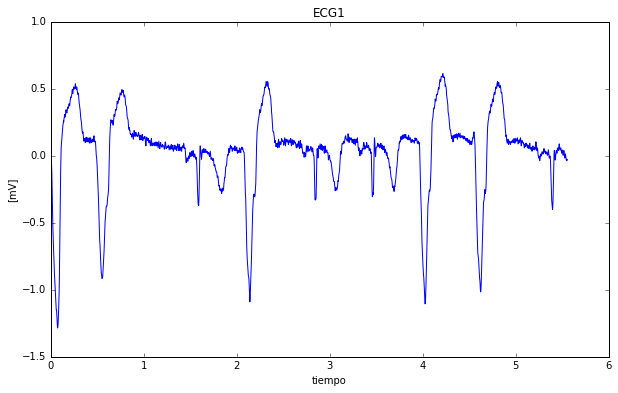

In [55]:
figSize = [10,6] # ancho, alto
plt.rcParams["figure.figsize"] = figSize
plt.xlabel("tiempo")
plt.ylabel("[mV]")
plt.title("ECG1")
plt.plot(ts, ecg1)

### Convertimos al dominio de la frecuencia usando DFT
La función `dft` devuelve un array con números complejos, para visualizar la potencia usamos la función `np.absolute`

In [56]:
freq = dft(ecg1)
freq
freq_array = np.linspace(0,360,nSamples)
deltaF = fs / nSamples
power = np.absolute(freq) # potencia

In [61]:
deltaF

0.18

### Visualizamos el espectro de frecuencia obtenida con la DFT
Podemos notar que la transformada es periódica y que la frecuencia máxima es la frecuencia central, en este caso, alrededor de 1KHz

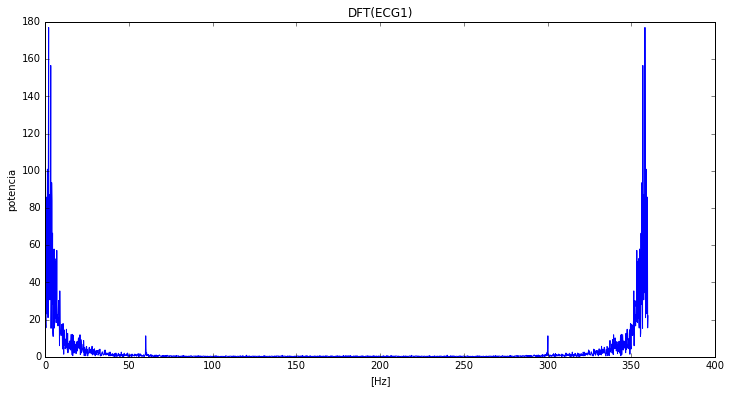

In [74]:
figSize = [12,6] # ancho, alto
plt.rcParams["figure.figsize"] = figSize
plt.xlabel("[Hz]")
plt.ylabel("potencia")
plt.title("DFT(ECG1)")
plt.plot(freq_array, power)

## analizando la señal ECG
Una señal de electrocardiograma posee componentes de frecuencia hasta los 30 Hz, visualizamos este rango accediendo al array powers usando las primeras 30 frecuencias

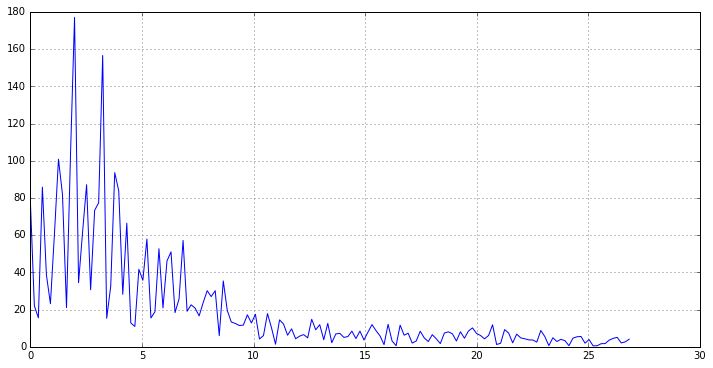

In [58]:
plt.grid(True)
disp_freq = 30
samples_per_freq = int(nSamples / fs)
plt.plot(freq_array[:(disp_freq * samples_per_freq)], power[:(disp_freq * samples_per_freq)])

### Extrayendo la frecuencia fundamental
Para extraer la frecuencia fundamental debemos encontrar el máximo de potencia en la transformada exceptuando el componente de continua

In [63]:
main_freq = np.argmax(power[1:(nSamples / 2)]) * deltaF
main_freq

1.7999999999999998

## Latidos por Minuto (BPM)
Los latidos por minuto son un indicador fundamental para el diagnóstico de arritmias cardiacas.

In [64]:
BPM = main_freq * 60
BPM

107.99999999999999

## Filtrando la señal usando la Transformada Inversa
Modificando la transformada, eliminando los componentes no deseados, frecuencias de ruido o interferencias, podemos filtrar la señal y reconstruirla usando la transformada inversa
usamos la función `idft`

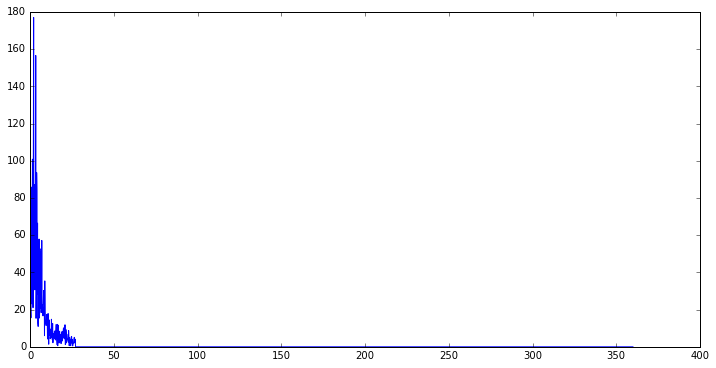

In [69]:
max_freq = 30 # máxima frecuencia de interés
max_idx = max_freq * samples_per_freq # máximo índice en la dft
freq2 = freq[np.arange(max_idx)] # extraemos los valores de interés
filt_freq = np.hstack([freq2, np.zeros(nSamples - max_idx)])
filt_power = np.absolute(filt_freq)
plt.plot(freq_array, filt_power)

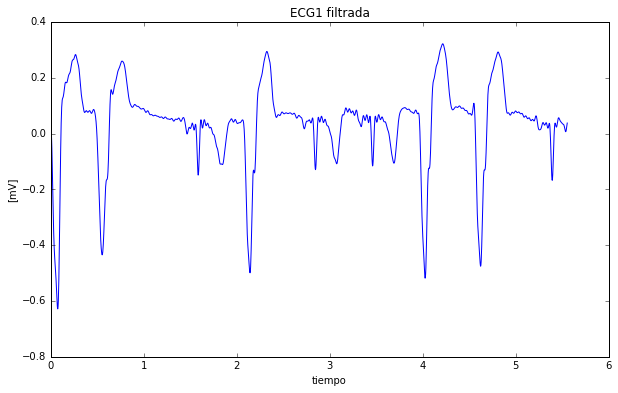

In [71]:
filt_ecg = idft(filt_freq)
figSize = [10,6] # ancho, alto
plt.rcParams["figure.figsize"] = figSize
plt.xlabel("tiempo")
plt.ylabel("[mV]")
plt.title("ECG1 filtrada")
plt.plot(ts, filt_ecg)

### Comparación de las señales

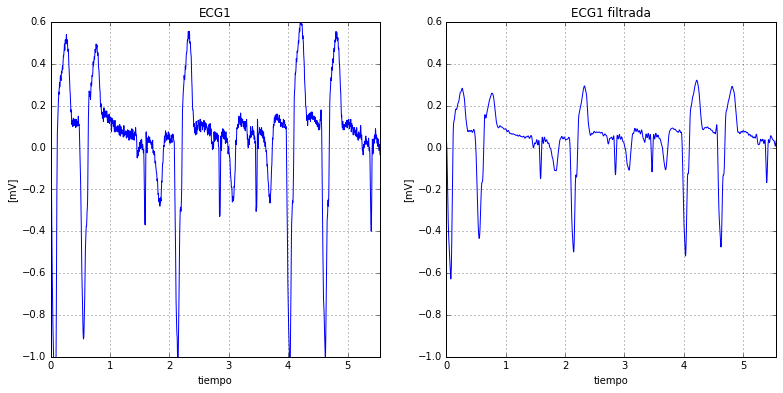

In [73]:
figSize = [13,6] # ancho, alto
plt.rcParams["figure.figsize"] = figSize
plt.subplot(121)
plt.axis([0, 5.55, -1.0, 0.6])
plt.grid(True)
plt.xlabel("tiempo")
plt.ylabel("[mV]")
plt.title("ECG1")
plt.plot(ts, ecg1)
plt.subplot(122)
plt.axis([0, 5.55, -1.0, 0.6])
plt.grid(True)
plt.xlabel("tiempo")
plt.ylabel("[mV]")
plt.title("ECG1 filtrada")
plt.plot(ts, filt_ecg)